In [1]:
import numpy as np
from pathlib import Path
from astropy.io import fits
from astropy.table import Table, vstack, hstack, unique,join
import matplotlib.pyplot as plt
import pandas as pd
import sys

# sys.path.append("/global/u2/b/bid13/VI/prospect/py")

import desispec.coaddition
import desispec.io
import desispec.spectra
# from desitarget.cmx.cmx_targetmask import cmx_mask
from desitarget.sv1.sv1_targetmask import desi_mask
from prospect import utilities,plotframes, myspecselect, myspecupdate
from desispec.coaddition import coadd_cameras
from prospect import utilities ,plotframes
# from prospect_my import plotframes

from stack_spectra import _common_grid

In [2]:
my_path = Path("/global/cscratch1/sd/bid13/stack-spectra")

In [3]:
spec = desispec.io.read_spectra(my_path /  "spectra_coadd_cam.fits")
zcat = Table.read(my_path / "zcat.fits")
flux = spec.flux['brz']
wl = spec.wave['brz']
ivar = spec.ivar['brz']

INFO:spectra.py:253:read_spectra: iotime 0.292 sec to read spectra_coadd_cam.fits at 2021-04-05T14:07:22.270448


In [4]:
print(len(flux[0]),len(ivar[0]))

7781 7781


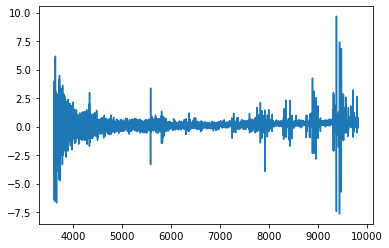

In [5]:
plt.plot(wl,flux[1])

In [6]:
def normalize(flux,ivar):
    norm = np.nanmedian(flux,axis=1).reshape(315,1)
    flux = flux/norm
    ivar = ivar*norm**2
    
    return ivar, flux

In [34]:
def wavg(flux,var=None,weighted=False):
    if weighted:
        num = np.nansum(flux*ivar,axis=0)
        denom = np.nansum(ivar,axis=0)
    
        if 0. in denom:
            denom[denom==0.0] = np.nan
    
        avg = np.nan_to_num(num/denom)
    else:
        avg = np.mean(flux,axis=0)
    return(avg)

In [8]:
new_f,new_i,new_wl = _common_grid(flux, wl, ivar, zcat['Z'], z_out=0.0, wave_grid=None)

In [9]:
i,f = normalize(new_f,new_i)

In [35]:
wavg_f = wavg(f,i)

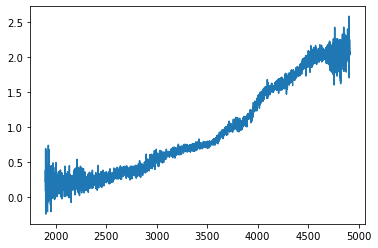

In [36]:
plt.plot(new_wl,wavg_f)

array([ -3.424125  , -19.03993669,  14.11282993, ...,   0.4740582 ,
         3.58030053,   0.28661597])